In [2]:
#data preprocessing
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

np.random.seed(42)
import seaborn as sns

In [3]:
IMAGES_PATH=os.path.join(os.getcwd(),"static/")
if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
data_file=os.path.join(os.getcwd(),"bcw.txt")
dataframe_all = pd.read_csv(data_file, sep=",", header=None)
dataframe_all.columns = ["ID", "CT", "cell_size", "cell_shape","MA","ECS","bare_nuclei","BC","normal_nuclei","Mitoses","CLASS"]

#  #  Attribute                     Domain
#    -- -----------------------------------------
#    1. Sample code number            id number
#    2. Clump Thickness               1 - 10
#    3. Uniformity of Cell Size       1 - 10
#    4. Uniformity of Cell Shape      1 - 10
#    5. Marginal Adhesion             1 - 10
#    6. Single Epithelial Cell Size   1 - 10
#    7. Bare Nuclei                   1 - 10
#    8. Bland Chromatin               1 - 10
#    9. Normal Nucleoli               1 - 10
#   10. Mitoses                       1 - 10
#   11. Class:                        (2 for benign, 4 for malignant)

# Preview data.
display(dataframe_all.head())

,ID,CT,cell_size,cell_shape,MA,ECS,bare_nuclei,BC,normal_nuclei,Mitoses,CLASS
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [5]:
dataframe_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID               699 non-null int64
CT               699 non-null int64
cell_size        699 non-null int64
cell_shape       699 non-null int64
MA               699 non-null int64
ECS              699 non-null int64
bare_nuclei      683 non-null float64
BC               699 non-null int64
normal_nuclei    699 non-null int64
Mitoses          699 non-null int64
CLASS            699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [6]:
num_rows = dataframe_all.shape[0]
# Calculate number of features. -1 because we are saving one as the target variable (Benign or malignant)
n_features = dataframe_all.shape[1] - 1



# Print the results
print "Total number of cases: {}".format(num_rows)
print "Number of features: {}".format(n_features)

columns = dataframe_all.columns
print(columns)


Total number of cases: 699
Number of features: 10
Index([u'ID', u'CT', u'cell_size', u'cell_shape', u'MA', u'ECS',
       u'bare_nuclei', u'BC', u'normal_nuclei', u'Mitoses', u'CLASS'],
      dtype='object')


In [7]:
dataframe_all.describe()

,ID,CT,cell_size,cell_shape,MA,ECS,bare_nuclei,BC,normal_nuclei,Mitoses,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
dataframe_all["CLASS"].value_counts()

2    458
4    241
Name: CLASS, dtype: int64

('Saving figure', 'discrete_attribute_histogram_plots')


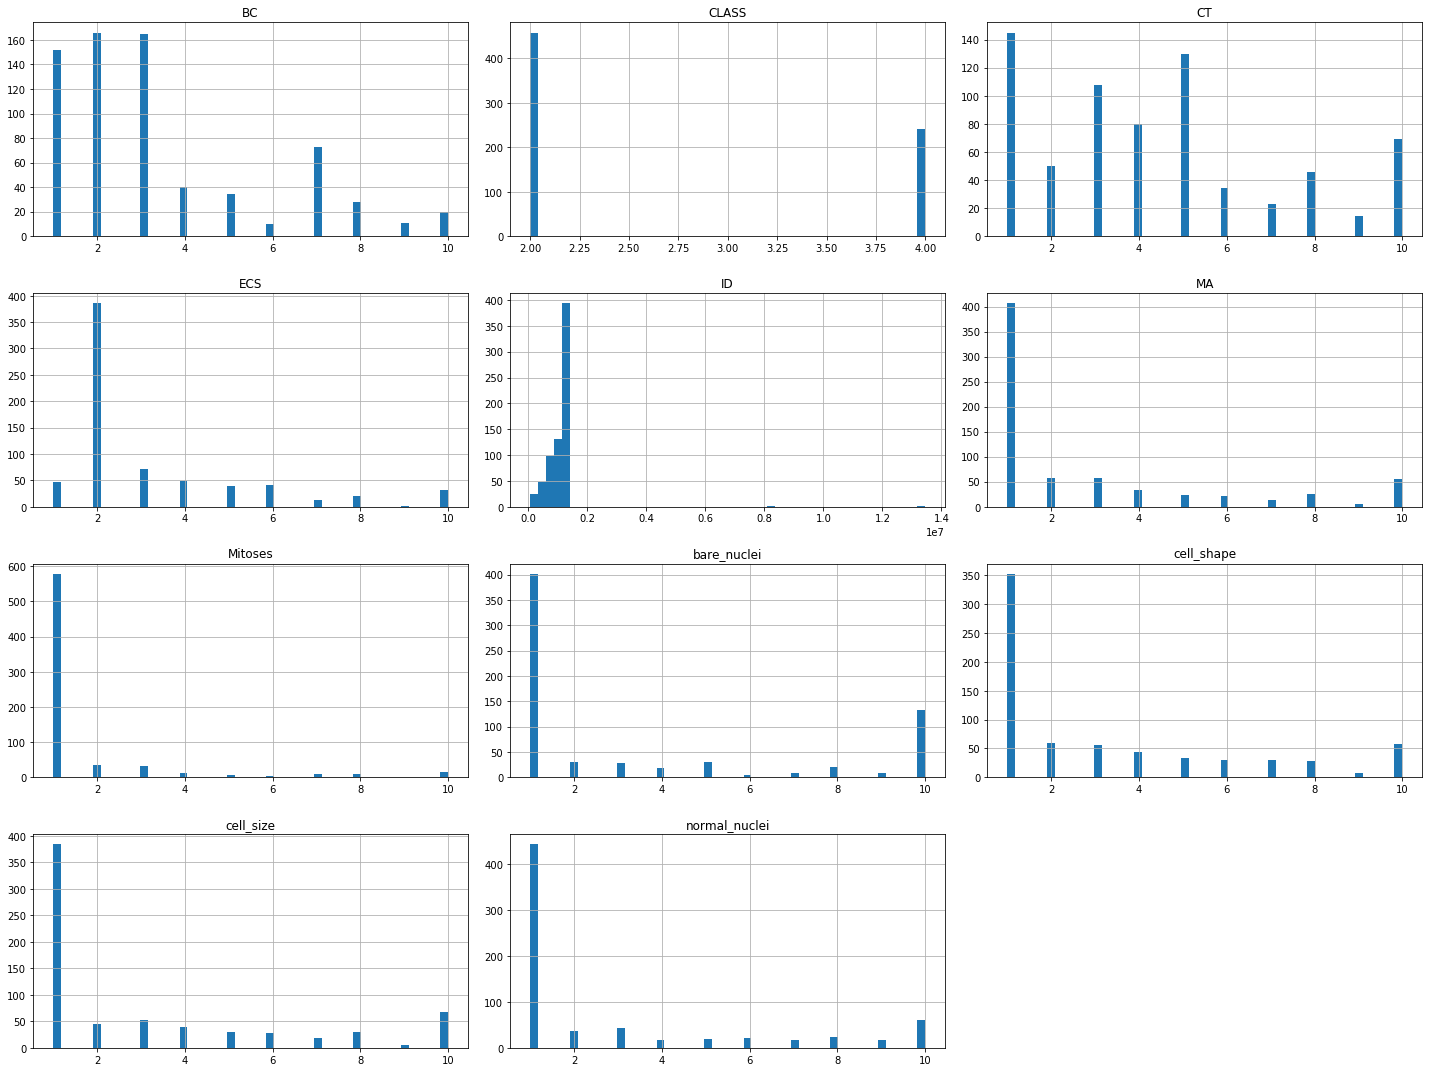

In [10]:
dataframe_all.hist(bins=50, figsize=(20,15))
save_fig("discrete_attribute_histogram_plots")
plt.show()

In [11]:
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]

In [12]:
dataframe_all = dataframe_all[counter_without_nan.keys()]

In [13]:
dataframe_all = dataframe_all.drop(dataframe_all.columns[[0]], axis=1)


In [14]:
display(dataframe_all.head())

,CT,cell_size,cell_shape,MA,ECS,BC,normal_nuclei,Mitoses,CLASS
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [15]:
dataframe_all["CLASS"] = dataframe_all["CLASS"].apply(lambda x: x/2 -1 )

In [16]:
display(dataframe_all.tail())

,CT,cell_size,cell_shape,MA,ECS,BC,normal_nuclei,Mitoses,CLASS
694,3,1,1,1,3,1,1,1,0
695,2,1,1,1,2,1,1,1,0
696,5,10,10,3,7,8,10,2,1
697,4,8,6,4,3,10,6,1,1
698,4,8,8,5,4,10,4,1,1


In [18]:
corr_matrix = dataframe_all.corr()
corr_matrix["CLASS"].sort_values(ascending=False)

CLASS            1.000000
cell_shape       0.818934
cell_size        0.817904
BC               0.756616
CT               0.716001
normal_nuclei    0.712244
MA               0.696800
ECS              0.682785
Mitoses          0.423170
Name: CLASS, dtype: float64

('Saving figure', 'discrete_feature_corelations')


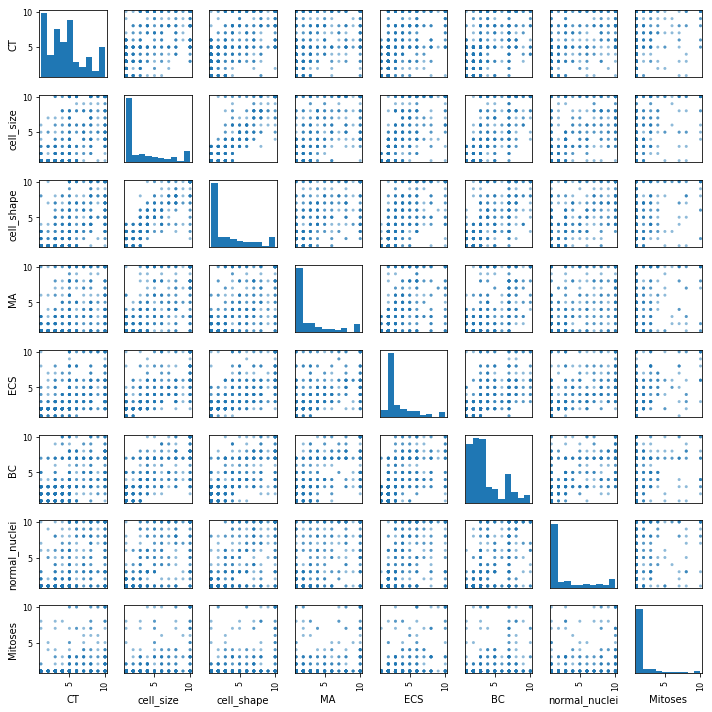

In [19]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix
features=['CT','cell_size','cell_shape','MA','ECS','BC','normal_nuclei','Mitoses']
scatter_matrix(dataframe_all[features], figsize=(10,10))
save_fig("discrete_feature_corelations")

In [22]:
from sklearn.preprocessing import StandardScaler
x = dataframe_all.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [23]:
from sklearn.cross_validation import train_test_split

/root/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
from sklearn.preprocessing import LabelEncoder
y = dataframe_all.ix[:,-1].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [25]:
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

('Saving figure', 't-SNE')


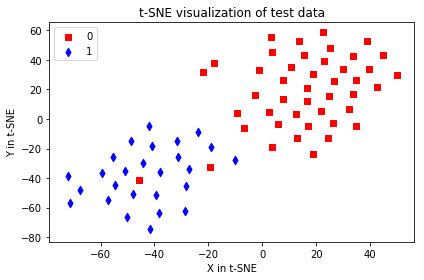

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

# scatter plot the sample points among 2 classes
markers=('s', 'd')
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
save_fig("t-SNE")
plt.show()


In [28]:
import xgboost as xgb
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC

In [29]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    
    return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print f1, acc
    print "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc)
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print "F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc)

In [30]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, x_train, y_train, x_test, y_test)
print ''
train_predict(clf_B, x_train, y_train, x_test, y_test)
print ''
train_predict(clf_C, x_train, y_train, x_test, y_test)
print ''

Training a LogisticRegression using a training set size of 629. . .
Trained model in 0.0036 seconds
Made predictions in 0.0004 seconds.
0.941724941725 0.960254372019
F1 score and accuracy score for training set: 0.9417 , 0.9603.
Made predictions in 0.0001 seconds.
F1 score and accuracy score for test set: 0.9434 , 0.9571.

Training a SVC using a training set size of 629. . .
Trained model in 0.0041 seconds
Made predictions in 0.0032 seconds.
0.949771689498 0.965023847377
F1 score and accuracy score for training set: 0.9498 , 0.9650.
Made predictions in 0.0004 seconds.
F1 score and accuracy score for test set: 0.9630 , 0.9714.

Training a XGBClassifier using a training set size of 629. . .
Trained model in 0.0299 seconds
Made predictions in 0.0018 seconds.
0.9792147806 0.985691573927
F1 score and accuracy score for training set: 0.9792 , 0.9857.
Made predictions in 0.0004 seconds.
F1 score and accuracy score for test set: 0.9630 , 0.9714.



In [31]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label=1)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(x_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print clf

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, x_train, y_train)
print "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc)
    
f1, acc = predict_labels(clf, x_test, y_test)
print "F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=40, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=2, silent=True,
       subsample=0.8)
Made predictions in 0.0009 seconds.
F1 score and accuracy score for training set: 0.9539 , 0.9682.
Made predictions in 0.0007 seconds.
F1 score and accuracy score for test set: 0.9630 , 0.9714.


/root/miniconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


('Saving figure', 'pairplots')


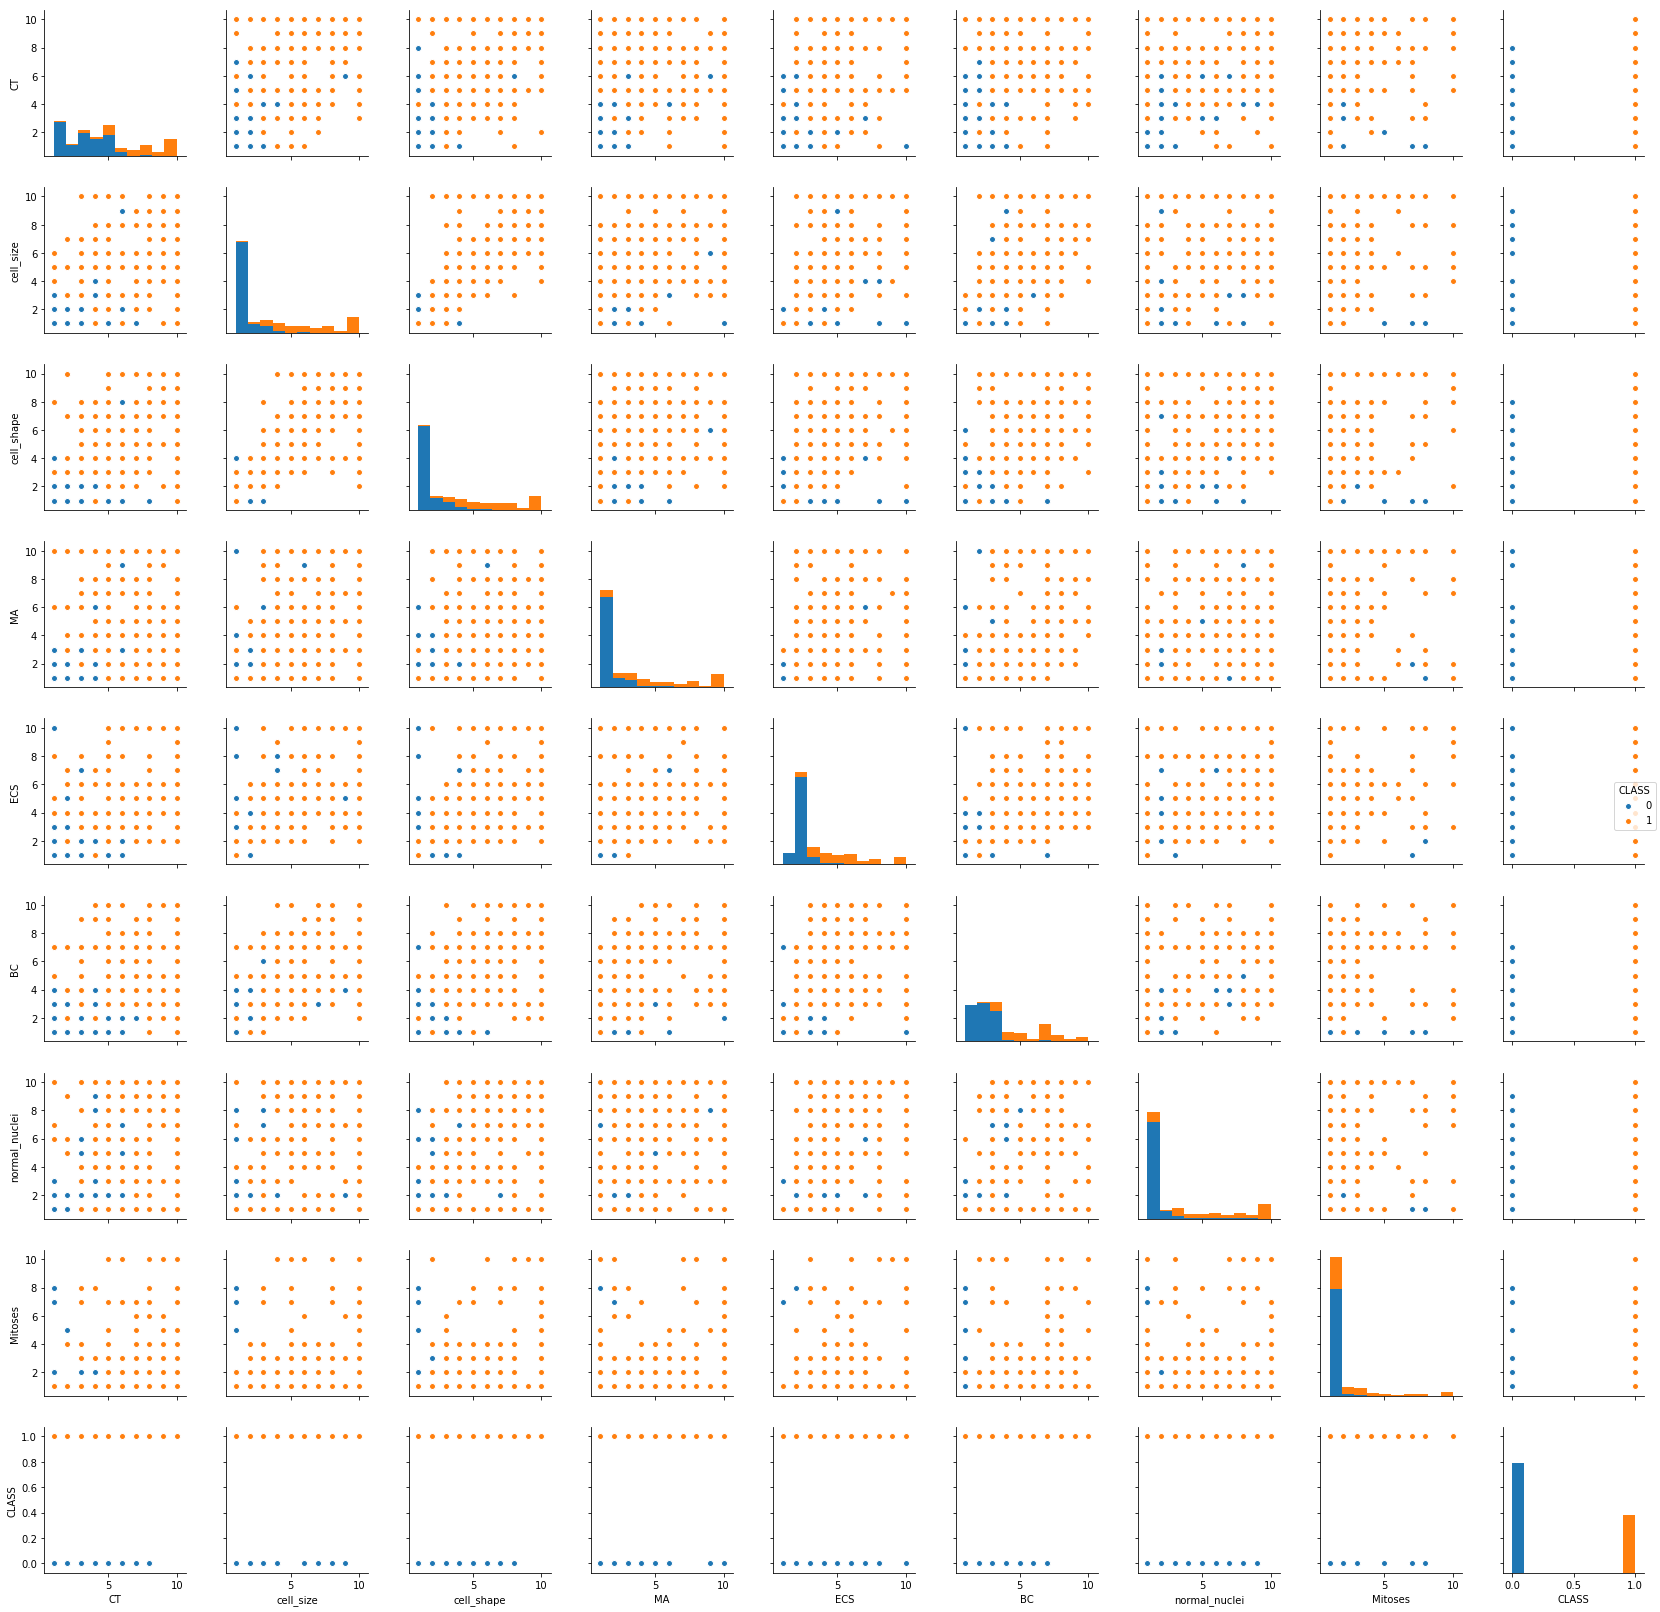

In [32]:
import seaborn as sns
features=['CT','cell_size','cell_shape','MA','ECS','BC','normal_nuclei','Mitoses']
fig=sns.pairplot(data=dataframe_all,hue='CLASS')
save_fig("pairplots")